In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

test_folder_path = '/content/drive/My Drive/Skin disease/test'


class_names_test = sorted([d.name for d in os.scandir(test_folder_path) if d.is_dir()])

for i, class_name in enumerate(class_names_test, start=1):
    print(f"Class {i}: {class_name}")

print(f"Total classes in test folder: {len(class_names_test)}")


Class 1: Acne and Rosacea Photos
Class 2: Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
Class 3: Atopic Dermatitis Photos
Class 4: Bullous Disease Photos
Class 5: Cellulitis Impetigo and other Bacterial Infections
Class 6: Eczema Photos
Class 7: Exanthems and Drug Eruptions
Class 8: Hair Loss Photos Alopecia and other Hair Diseases
Class 9: Herpes HPV and other STDs Photos
Class 10: Light Diseases and Disorders of Pigmentation
Class 11: Lupus and other Connective Tissue diseases
Class 12: Melanoma Skin Cancer Nevi and Moles
Class 13: Nail Fungus and other Nail Disease
Class 14: Poison Ivy Photos and other Contact Dermatitis
Class 15: Psoriasis pictures Lichen Planus and related diseases
Class 16: Scabies Lyme Disease and other Infestations and Bites
Class 17: Seborrheic Keratoses and other Benign Tumors
Class 18: Systemic Disease
Class 19: Tinea Ringworm Candidiasis and other Fungal Infections
Class 20: Urticaria Hives
Class 21: Vascular Tumors
Class 22: Vasculitis

<ipython-input-5-6bf2d825acb0>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=torch.device('cpu'))


Model loaded successfully!


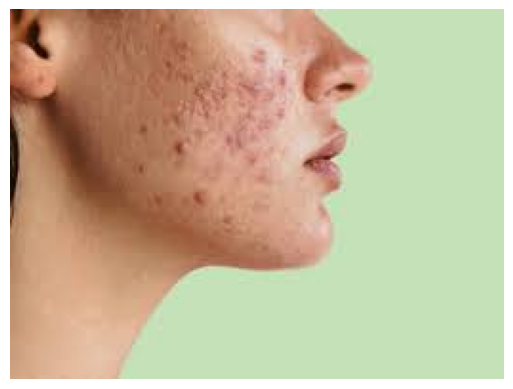

Predicted class: 5


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load ResNet18 and modify the final fully connected layer to match 23 classes
model = models.resnet18(pretrained=False)  # Use pretrained=True if you want to use a pre-trained model
model.fc = nn.Linear(model.fc.in_features, 23)  # Adjust for 23 classes

# Load the saved model's weights
model_path = '/content/drive/My Drive/Skin_disease_model.pth'
checkpoint = torch.load(model_path, map_location=torch.device('cpu'))

# Load the weights into the model
model.load_state_dict(checkpoint)
model.eval()
print("Model loaded successfully!")

# Load and display the image for testing
image_path = '/content/images.jpg'
image = Image.open(image_path).convert('RGB')
plt.imshow(image)
plt.axis('off')
plt.show()

# Define image preprocessing transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet expects input size of 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Preprocess the image
image_tensor = transform(image).unsqueeze(0)

# Perform prediction with the loaded model
with torch.no_grad():
    output = model(image_tensor)
    predicted_class = torch.argmax(output, dim=1).item()

# Display the predicted class
print(f"Predicted class: {predicted_class}")
